In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading out the dataset
data = pd.read_csv("G:\Data Science\Datasets\student_performance\student.csv")

In [5]:
data.head() #getting the first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.shape  #checking out the shape of the dataset

(1000, 8)

In [7]:
data.tail() #checking out the last 5 rows of the dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data['gender'].dtypes

dtype('O')

In [10]:
data['gender'].dtypes =='O'

True

In [11]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
cat_col = [fea for fea in data.columns if data[fea].dtypes=='O']  #segregating the categorical columns

In [13]:
num_col = [fea for fea in data.columns if data[fea].dtypes!='O']  #segregating the numerical columns

In [14]:
data[cat_col]  #checking out the categorical column

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [15]:
data[num_col]  #checking out the numerical column

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [16]:
data.memory_usage()  #checking out the memory usage of each columns

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

### Missing values

In [17]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
data.isnull().sum().sum()  #getting the sum of all the null values in dataset

0

In [19]:
data.duplicated().sum()  #getting the sum of all the duplicated rows in dataset

0

In [20]:
data.nunique()  #getting unique values in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [21]:
data['gender'].unique()   #checking out the unique values in a particular column

array(['female', 'male'], dtype=object)

In [22]:
data.describe()    #getting the statistical analysis of the column

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## checking dispersion of the data

In [23]:
data.describe().T  #getting the transpose of the statistics

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [24]:
data.corr()  #getting the correlation of each column

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


### observation- if we are good reader then we are good writer

In [25]:
data.cov()   #checking covariance of data

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [26]:
data.skew()  #checking skewness of data

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<Axes: xlabel='math score', ylabel='Density'>

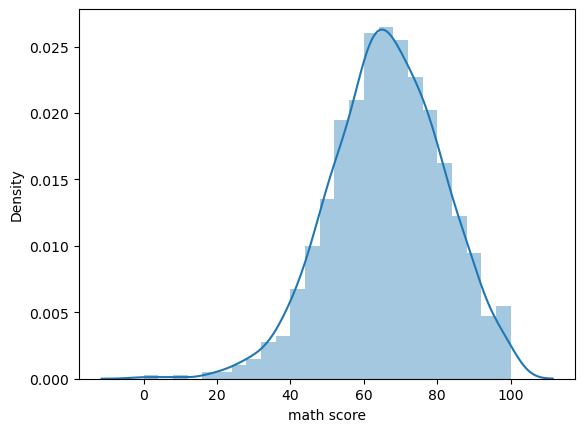

In [27]:
sns.distplot(data['math score'])  #plotting the distplot, it is left skewed data

In [28]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [29]:
 #adding the average score column to the dataset
data['average'] = (data['math score']+data['reading score']+data['writing score'])/3 

In [30]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [31]:
data.groupby('gender').mean()   #getting the statistics based on the gender column

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [32]:
data.groupby("gender").count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [33]:
#question:find out number of students who is having less than 30 marks

data[data['math score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [34]:
data[data['math score']<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
average                        14
dtype: int64

In [35]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average'],
      dtype='object')

In [36]:
data_num  = data[num_col]

In [37]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [38]:
from scipy.stats import normaltest

In [39]:
p_value = normaltest(data_num['math score'])[1]*100

if p>0.05:
    print("normally distributed")  

<Axes: xlabel='math score', ylabel='Density'>

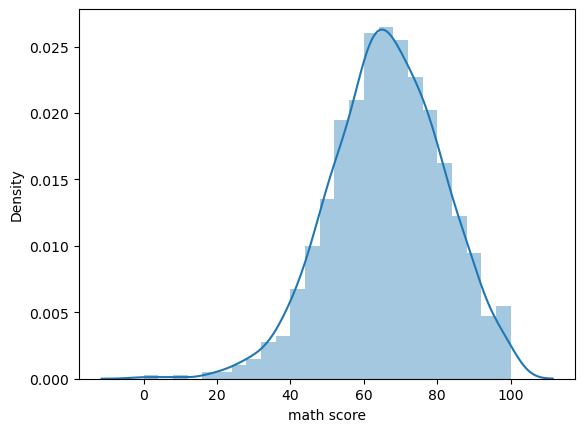

In [40]:
sns.distplot(data_num['math score'])

## outlier

<Axes: >

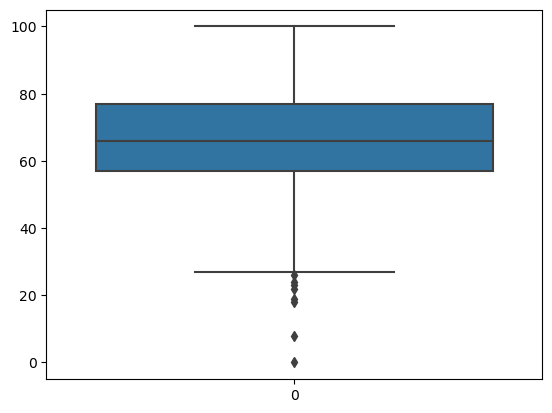

In [41]:
sns.boxplot(data = data['math score'])

<Axes: >

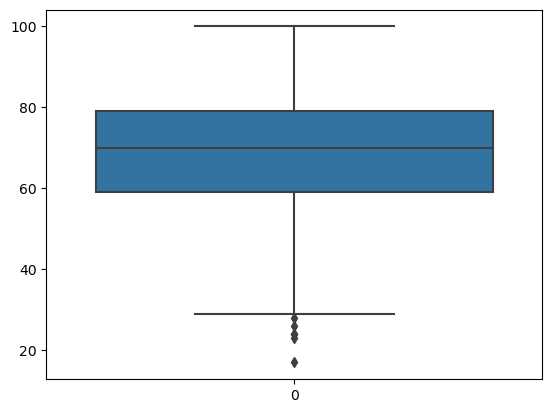

In [42]:
sns.boxplot(data = data['reading score'])

<Axes: >

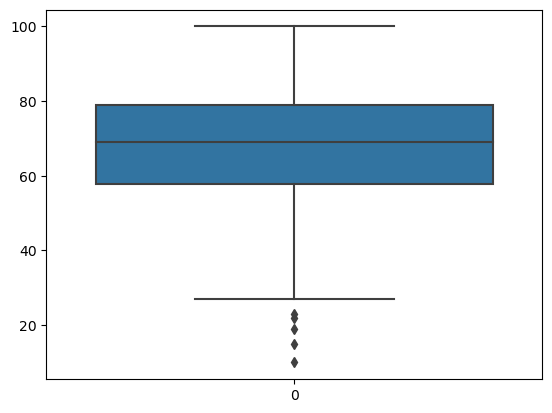

In [43]:
sns.boxplot(data = data['writing score'])

### we are having outliers in the negative side

In [44]:
q1 = data['math score'].quantile(0.10)

In [45]:
q3 = data['math score'].quantile(0.90)

In [46]:
IQR = q3-q1

In [47]:
IQR

39.0

In [48]:
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)

In [49]:
(upper_limit,lower_limit)

(144.5, -11.5)

In [50]:
data[data['math score']<lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [51]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


### since there are no data below the lower limit and above the upper limit there are no outliers

In [52]:
data['math score'].min()

0

In [53]:
data['math score'].max()

100

In [54]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [55]:
data['math score'].quantile(1)

100.0

### changing the values of quantiles to 25% and 75%

In [56]:
q1 = data['math score'].quantile(0.25)
q3 = data['math score'].quantile(0.75)
IQR = q3-q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)
(upper_limit,lower_limit)

(107.0, 27.0)

In [57]:
data[data['math score']<lower_limit]  #these are the outliers 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [58]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [59]:
def outlier_threshold(df,variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3+(1.5*IQR)
    lower_limit = q1-(1.5*IQR)
    return lower_limit,upper_limit

In [60]:
num_col

['math score', 'reading score', 'writing score']

In [61]:
for variable in num_col:
    lower_limit,upper_limit = outlier_threshold(data,variable)
    print(lower_limit,upper_limit)

27.0 107.0
29.0 109.0
25.875 110.875


In [62]:
def replace_with_threshold(data_num,variable):
    for variable in num_col:
        lower_limit,upper_limit = outlier_threshold(data,variable)
        low_limit = data.loc[data[data[variable]<lower_limit],variable]
        up_limit =data.loc[data[data[variable]>upper_limit],variable]
        pass

## Analysis with Graph

In [64]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<Axes: xlabel='gender', ylabel='count'>

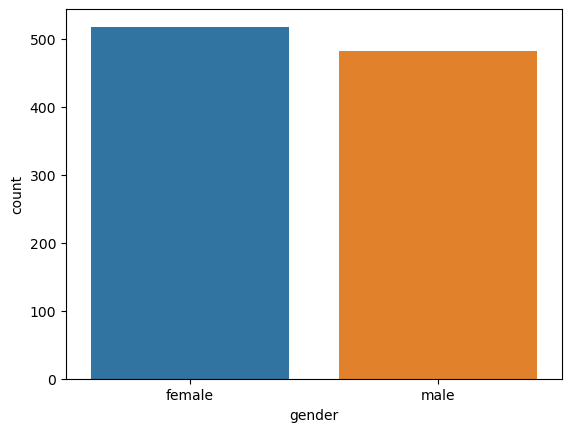

In [69]:
sns.countplot(x = data['gender'])

<Axes: xlabel='race/ethnicity', ylabel='count'>

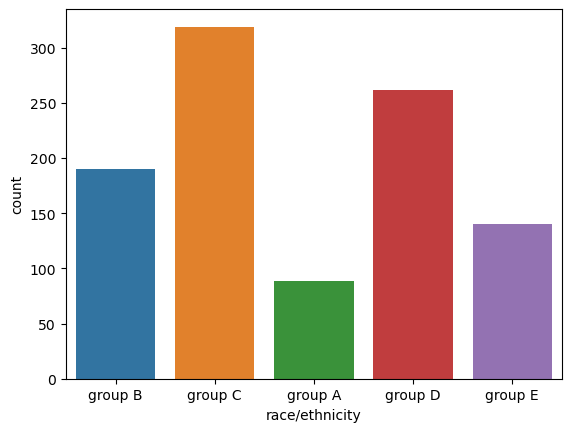

In [70]:
sns.countplot(x = data['race/ethnicity'])  #here there is imbalance of the data

In [73]:
df = data.groupby("gender").mean()

In [74]:
df

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [76]:
df['average'][0]

69.56949806949807

In [77]:
df['average'][1]

65.8374827109267

In [78]:
df['math score'][0]

63.633204633204635

In [80]:
df['math score'][1]

68.72821576763485

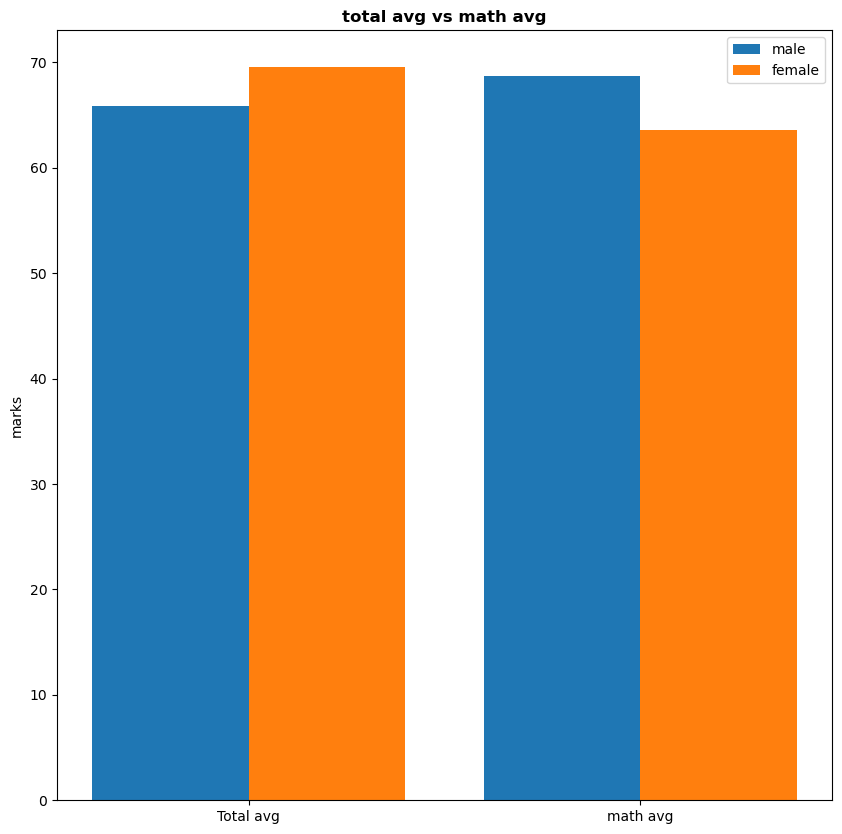

In [82]:
plt.figure(figsize = (10,10))
x = ['Total avg','math avg']
female_score=  df['average'][0],df['math score'][0]
male_score=  df['average'][1],df['math score'][1]
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2,male_score,0.4,label = 'male')
plt.bar(x_axis+0.2,female_score,0.4,label = "female")

plt.xticks(x_axis,x)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight = 'bold')
plt.legend()
plt.show()

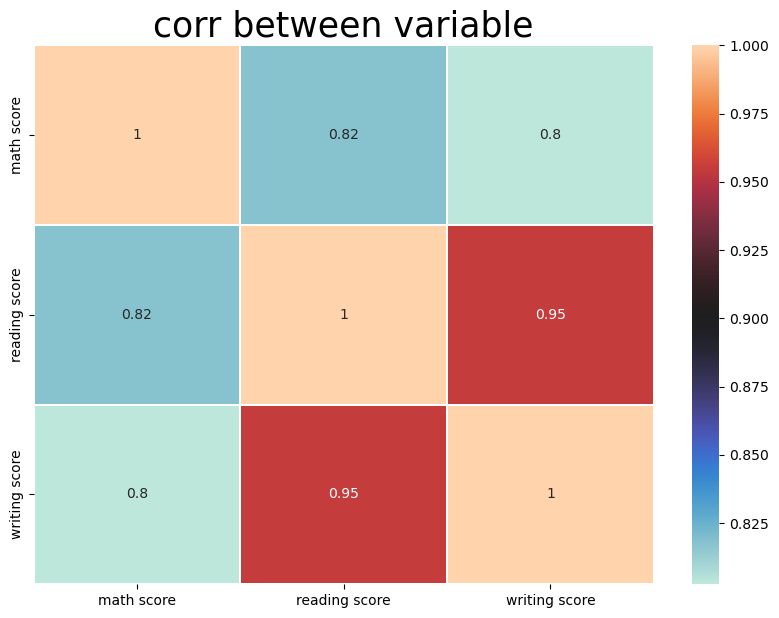

In [92]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths = 0.3)
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title("corr between variable",color = "black",size = 25)
plt.show()

In [89]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


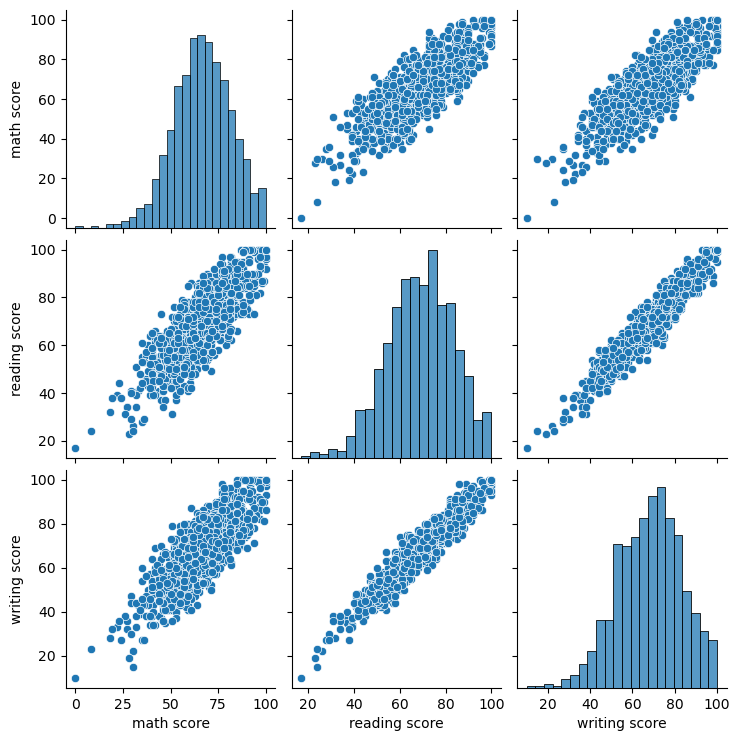

In [87]:
sns.pairplot(data_num)

<Axes: >

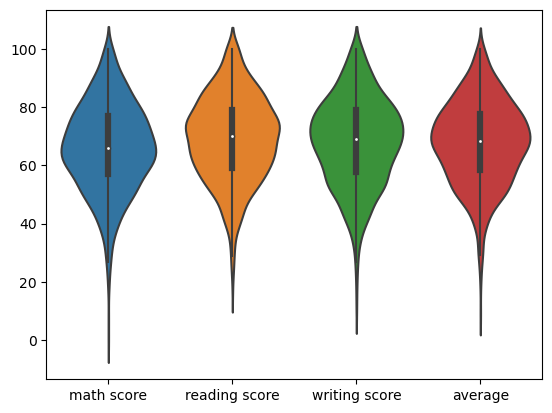

In [95]:
sns.violinplot(data = data)

In [96]:
np.log(data_num['math score'])

0      4.276666
1      4.234107
2      4.499810
3      3.850148
4      4.330733
         ...   
995    4.477337
996    4.127134
997    4.077537
998    4.219508
999    4.343805
Name: math score, Length: 1000, dtype: float64

<Axes: xlabel='math score', ylabel='Density'>

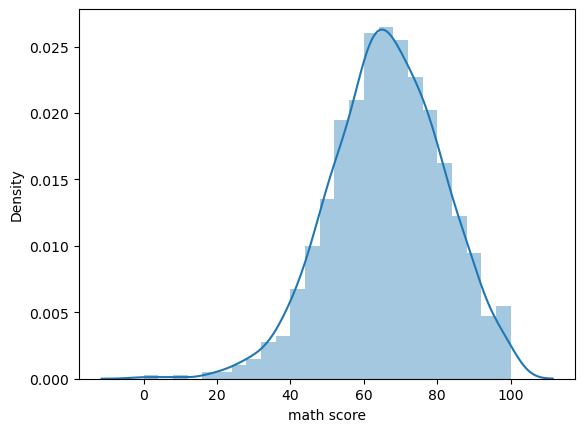

In [97]:
sns.distplot(data_num['math score'])

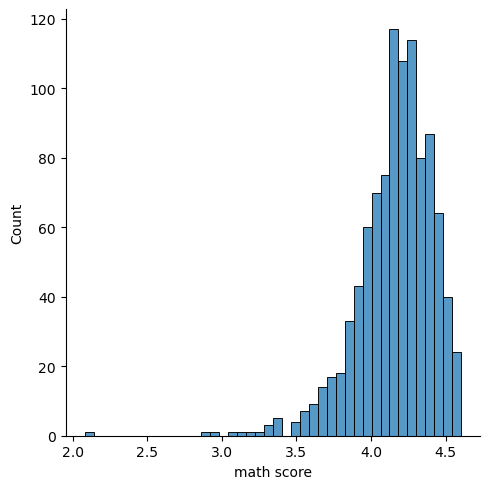

In [103]:
sns.displot(np.log(data_num['math score']))